In [1]:
import os
#os.system("cd ..")
#from animation import readMat
print(os.getcwd())

while os.getcwd() != "/home/ahmadshakleya/Documents/Modelica/Model":
    os.system("cd ..")

from animation import readMat, animate_gantry_system

/home/ahmadshakleya/Documents/Modelica/Model


In [2]:
root_dir = "BIP_PID_PACKAGE.GantryTrolley_PID_CONTROL_LOOP"
os.chdir(root_dir)
print(os.listdir())

['GantryTrolley_PID_CONTROL_LOOP_init.xml', 'GantryTrolley_PID_CONTROL_LOOP_JacA.bin', 'GantryTrolley_PID_CONTROL_LOOP.log', 'GantryTrolley_PID_CONTROL_LOOP_info.json', 'GantryTrolley_PID_CONTROL_LOOP_prof.realdata', 'GantryTrolley_PID_CONTROL_LOOP_res.mat', 'GantryTrolley_PID_CONTROL_LOOP_prof.intdata', 'GantryTrolley_PID_CONTROL_LOOP']


In [3]:
def single_simulation(Kp = 0, Ki = 0, Kd = 0):
    simulation_command = "./GantryTrolley_PID_CONTROL_LOOP -override Kp="+str(Kp)+",Ki="+str(Ki)+",Kd="+str(Kd)
    os.system(simulation_command)
    [names, data] = readMat("GantryTrolley_PID_CONTROL_LOOP_res.mat")
    return [names, data]

[names, data] = single_simulation(1)
print(names)
print(data)

LOG_STDOUT        | warning | You are overriding Kd with a small value or zero.
|                 | |       | This could lead to numerically dirty solutions or divisions by zero if not tearingStrictness=veryStrict.
LOG_STDOUT        | warning | You are overriding Ki with a small value or zero.
|                 | |       | This could lead to numerically dirty solutions or divisions by zero if not tearingStrictness=veryStrict.
LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.
LOG_SUCCESS       | info    | The simulation finished successfully.
['time', 'gantryTrolley_PIDController.derivative.x', 'gantryTrolley_PIDController.integrator.y', 'gantryTrolley_PlantModel_Block.omega', 'gantryTrolley_PlantModel_Block.theta', 'gantryTrolley_PlantModel_Block.v', 'gantryTrolley_PlantModel_Block.x', 'der(gantryTrolley_PIDController.derivative.x)', 'der(gantryTrolley_PIDController.integrator.y)', 'der(gantryTrolley_PlantModel_Block.omega)', 'der(gantryTro

LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.
LOG_SUCCESS       | info    | The simulation finished successfully.


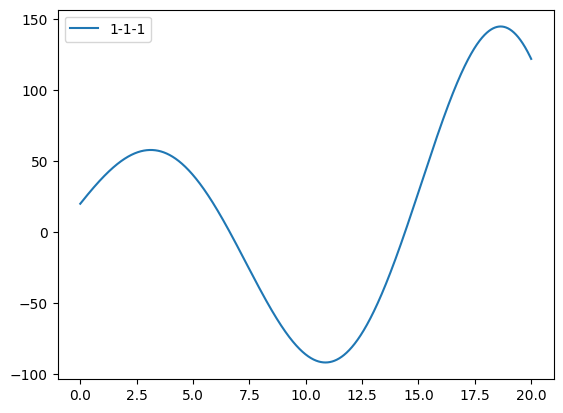

LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.
LOG_SUCCESS       | info    | The simulation finished successfully.


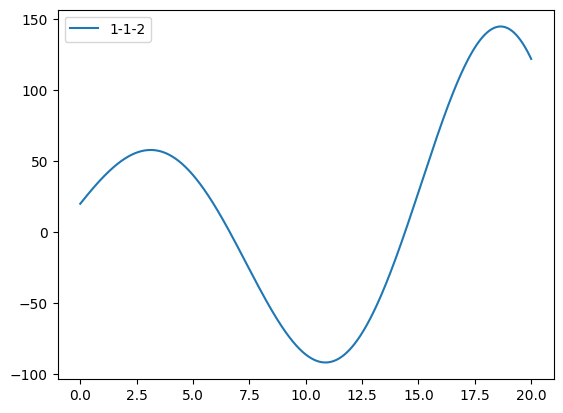

LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.
LOG_SUCCESS       | info    | The simulation finished successfully.


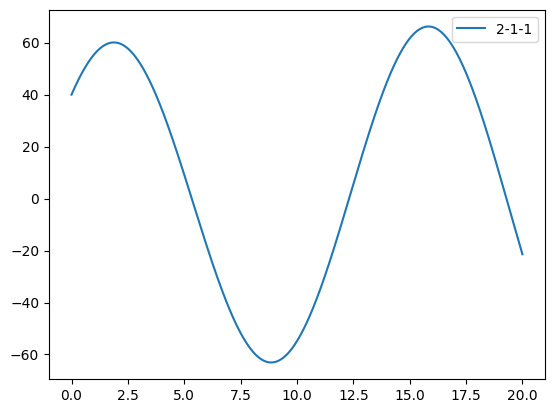

LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.
LOG_SUCCESS       | info    | The simulation finished successfully.


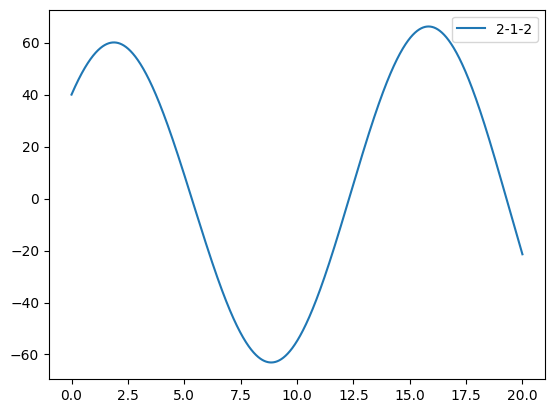

LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.
LOG_SUCCESS       | info    | The simulation finished successfully.


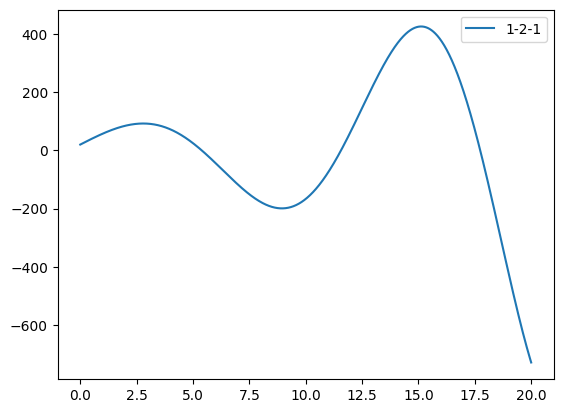

LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.
LOG_SUCCESS       | info    | The simulation finished successfully.


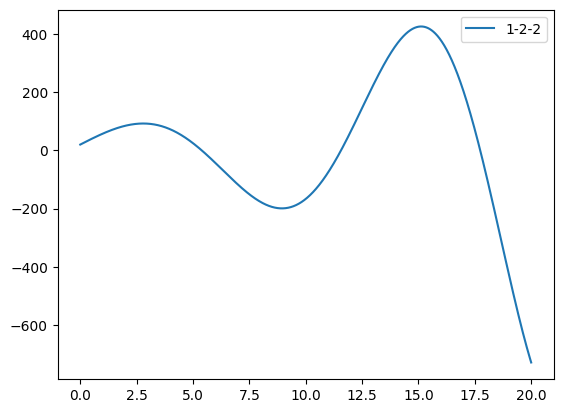

LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.
LOG_SUCCESS       | info    | The simulation finished successfully.


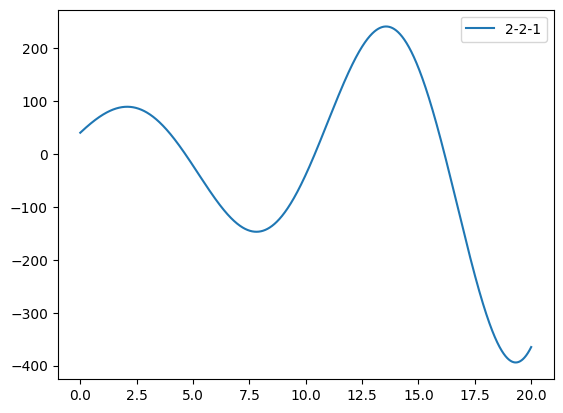

LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.
LOG_SUCCESS       | info    | The simulation finished successfully.


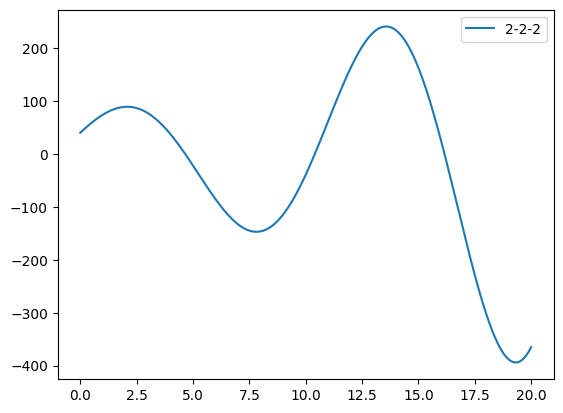

In [27]:
import matplotlib.pyplot as plt
import numpy as np
legend_list = []
for ki in np.arange(1, 3, 1):
    for kp in np.arange(1, 3, 1):
        for kd in np.arange(1, 3, 1):
            [names, data] = single_simulation(kp, ki, kd)
            time_index = names.index('time')
            u_index = names.index('gantryTrolley_PlantModel_Block.u')
            time_data = data[time_index]
            u_array = data[u_index]
            legend_list.append(str(kp)+"-"+str(ki)+"-"+str(kd))
            plt.plot(time_data, u_array)
            #plt.legend(legend_list)
            plt.legend([str(kp)+"-"+str(ki)+"-"+str(kd)])
            plt.show()


